In [77]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import f_oneway, chi2_contingency, ttest_ind



In [78]:
sns.set(style="whitegrid")

## Предваритальная работа с данными

In [79]:
data = pd.read_csv('shopping_trends.csv')

In [80]:
df = data.copy()
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [81]:
df.shape

(3900, 19)

In [82]:
df = df.drop_duplicates()
df.shape

(3900, 19)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [84]:
df.isnull().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [85]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [86]:
df.describe(include=['object'])

,Gender,Item Purchased,Category,Location,Size,Color,Season,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Preferred Payment Method,Frequency of Purchases
count,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900
unique,2,25,4,50,4,25,4,2,6,6,2,2,6,7
top,Male,Blouse,Clothing,Montana,M,Olive,Spring,No,Credit Card,Free Shipping,No,No,PayPal,Every 3 Months
freq,2652,171,1737,96,1755,177,999,2847,696,675,2223,2223,677,584


In [87]:
set(df['Category'])

{'Accessories', 'Clothing', 'Footwear', 'Outerwear'}

In [88]:
set(df['Payment Method'])

{'Bank Transfer', 'Cash', 'Credit Card', 'Debit Card', 'PayPal', 'Venmo'}

In [89]:
set(df['Shipping Type'])

{'2-Day Shipping',
 'Express',
 'Free Shipping',
 'Next Day Air',
 'Standard',
 'Store Pickup'}

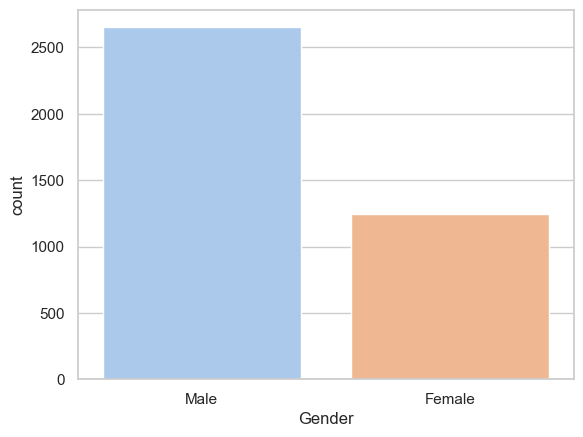

In [90]:
sns.countplot(data=df, x='Gender', hue='Gender', palette='pastel');

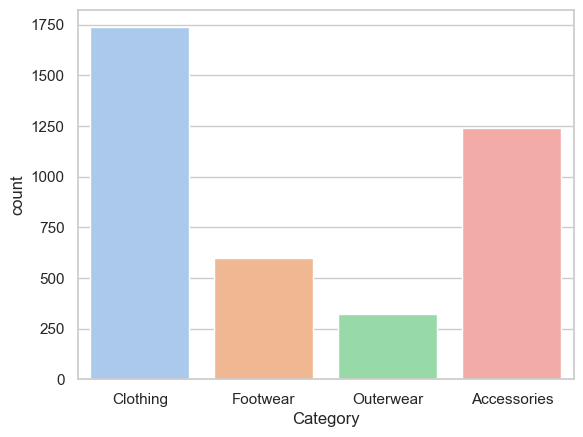

In [91]:
sns.countplot(data=df, x='Category', hue='Category', palette='pastel');

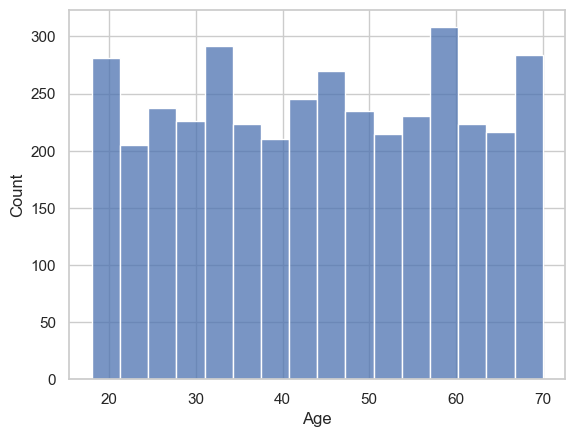

In [92]:
sns.histplot(data=df, x='Age');

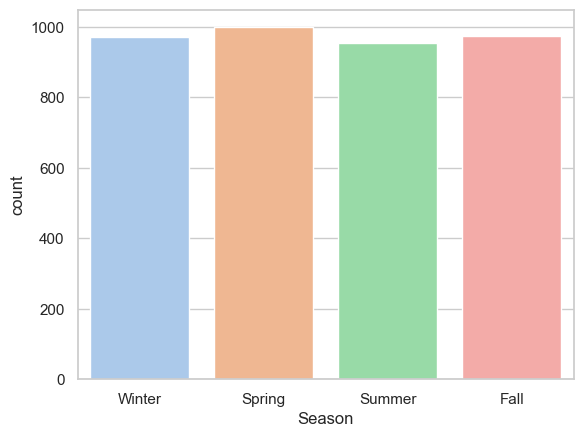

In [93]:
sns.countplot(data=df, x='Season', hue='Season', palette='pastel');

In [94]:
df["Item Purchased"].value_counts()

Item Purchased
Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Sandals       160
Socks         159
Skirt         158
Shorts        157
Scarf         157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: count, dtype: int64

## <h2>Задание 1.1</h2>


На основании этих данных необходимо составить максимальное(но не менее пяти) количество гипотез о корреляциях между отдельными столбцами и проверить их. 

При этом при составлении гипотез можно рассматривать не полный df, а именно выборки (например: "женщины старше 40 лет покупают в основном осенью")

Проверим следующие гипотезы:
- Клиенты среднего возраста (примерно 30-40 лет) совершают более крупные покупки по сравнению с остальными возрастными группами;
- Женщины делают более крупные покупки;
- Покупатели чаще приобретают сезонные товары в течение соответствующего сезона;
- Клиенты с подпиской получают скидку;
- Клиенты с промокодом тратят больше, чем покупатели без него;
- Мужчины чаще приобретают подписку. 

##### 1. Клиенты среднего возраста (примерно 30-40 лет) совершают более крупные покупки по сравнению с остальными возрастными группами

Для начала разделим клиентов по возрастным группам на основе квантилей.
После чего проанализируем среднюю сумму покупок для каждой возрастной группы.

In [95]:
quantiles = (
    pd.DataFrame(df['Age'].quantile([0,0.25,0.5,0.75,1]).reset_index())
    .rename(columns={'index':'percentile'})
)
quantiles

,percentile,Age
0,0.00,18.0
1,0.25,31.0
2,0.50,44.0
3,0.75,57.0
4,1.00,70.0


In [96]:
perc = df['Age'].quantile([0,0.25,0.5,0.75,1])

df['Age_segment']= pd.cut(
    df['Age'],
    bins=[0, perc[0.25],perc[0.5], perc[0.75], perc[1]],
    labels=['0-31', '32-44', '45-57', '57+'],
    include_lowest=True
)

C:\Users\tanme\AppData\Local\Temp\ipykernel_17480\3479151971.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




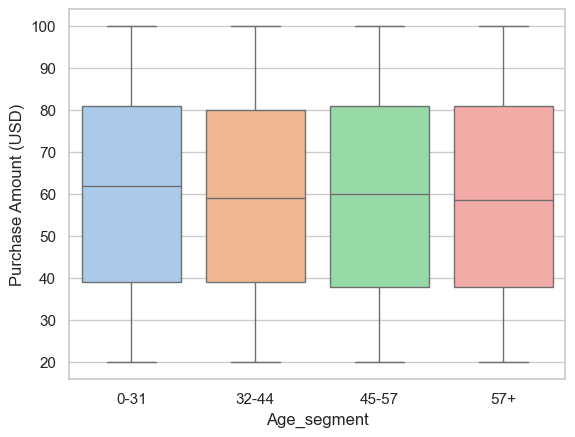

In [97]:
sns.boxplot(data=df, x='Age_segment', y='Purchase Amount (USD)', palette='pastel');

Чтобы определить, действительно ли разница в средней сумме покупок между группами незначительна, можно также использовать ANOVA.

- Нулевая гипотеза (H₀): Средние значения всех групп одинаковы (нет различий).
- Альтернативная гипотеза (H₁): По крайней мере одна из групп имеет среднее значение, отличное от других.

In [98]:

group_0_31 = df[df['Age_segment'] == '0-31']['Purchase Amount (USD)']
group_32_44 = df[df['Age_segment'] == '32-44']['Purchase Amount (USD)']
group_45_57 = df[df['Age_segment'] == '45-57']['Purchase Amount (USD)']
group_57_plus = df[df['Age_segment'] == '57+']['Purchase Amount (USD)']

f_stat, p_value = f_oneway(group_0_31, group_32_44, group_45_57, group_57_plus)
print(f"ANOVA F-statistic = {f_stat:.3f}, p-value = {p_value:.3f}")

ANOVA F-statistic = 0.665, p-value = 0.573


`F-statistic = 0.665` показывает, что различия между средними значениями возрастных групп относительно невелики по сравнению с внутригрупповой вариативностью. То есть вариативность внутри каждой возрастной группы больше, чем между группами.

`P-value > 0.05`, нет статистически значимых различий между возрастными группами. Мы не отвергаем нулевую гипотезу (H₀) : средние значения во всех возрастных группах равны.

Таким образом, клиенты всех возрастных групп делают примерно одинаковые покупки.

##### 2. Женщины делают более крупные покупки

C:\Users\tanme\AppData\Local\Temp\ipykernel_17480\3803097098.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




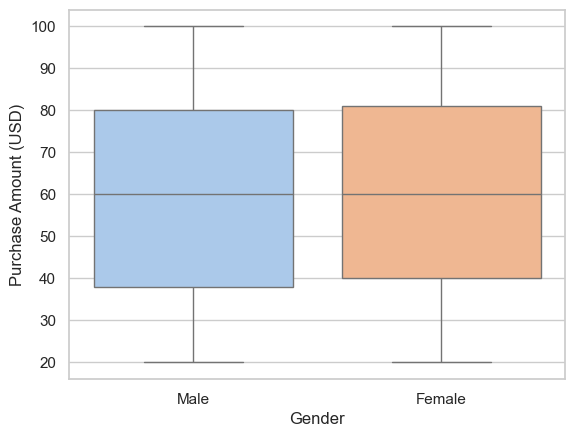

In [99]:
sns.boxplot(data=df, x='Gender', y='Purchase Amount (USD)', palette='pastel');

Сравним среднюю сумму покупки между полами с помощью t-теста.

In [100]:
avg_women = df[df['Gender'] == 'Female']['Purchase Amount (USD)'].mean()
avg_men = df[df['Gender'] == 'Male']['Purchase Amount (USD)'].mean()
print(f"Women: ${avg_women:.2f}\nMen: ${avg_men:.2f} ")
t_stat, p_value = ttest_ind(df[df['Gender'] == 'Female']['Purchase Amount (USD)'], 
                            df[df['Gender'] == 'Male']['Purchase Amount (USD)'])

print(f"T-statistic = {t_stat:.3f}, p-value = {p_value:.3f}")

Women: $60.25
Men: $59.54 
T-statistic = 0.877, p-value = 0.381


`P-value > 0.05`, нет статистически значимых различий между полами. Все делают примерно одинаковые покупки.

##### 3. Покупатели чаще приобретают сезонные товары в течение соответствующего сезона.

Проверим зависимость между сезоном и популярностью товаров через хи-квадрат тест.

In [101]:
season_item_table = pd.crosstab(df['Season'], df['Category'])

chi2, p, dof, expected = chi2_contingency(season_item_table)

print(f"Chi-square statistic = {chi2:.3f}, P-value = {p:.3f}")

Chi-square statistic = 7.934, P-value = 0.541


`P-value > 0.05`, нет статистически значимых различий в покупках между сезонами.

##### 4. Клиенты с подпиской получают скидку

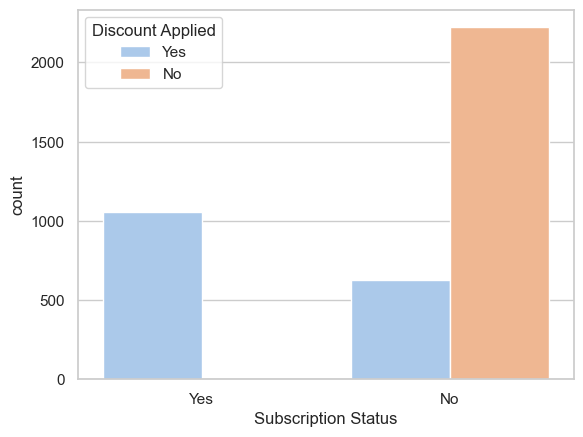

In [102]:
sns.countplot(data=df, x='Subscription Status', hue='Discount Applied', palette='pastel');

Действительно, у всех клиентов с подпиской есть скидка.

##### 5. Клиенты с промокодом тратят больше, чем покупатели без него

C:\Users\tanme\AppData\Local\Temp\ipykernel_17480\3984076746.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




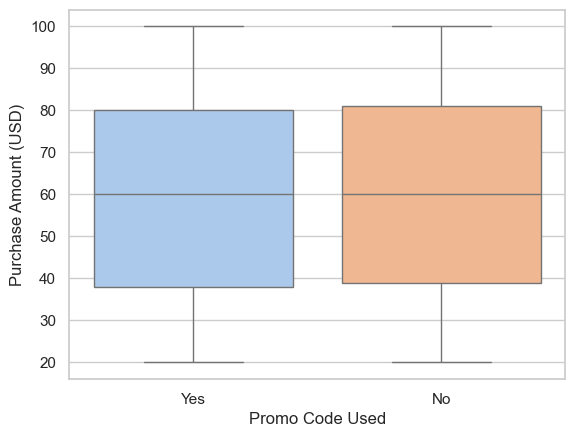

In [103]:
sns.boxplot(data=df, x='Promo Code Used', y='Purchase Amount (USD)', palette='pastel');

In [104]:
promo_users = df[df['Promo Code Used'] == 'Yes']
non_promo_users = df[df['Promo Code Used'] == 'No']

In [105]:
avg_promo = promo_users['Purchase Amount (USD)'].mean()
avg_non_promo = non_promo_users['Purchase Amount (USD)'].mean()
print(f'Cредняя сумма покупки :\n${avg_promo:.4}(Promo Code Used) и ${avg_non_promo:.4}(Non-Promo Code Used)')


Cредняя сумма покупки :
$59.28(Promo Code Used) и $60.13(Non-Promo Code Used)


In [106]:
t_stat, p_value = ttest_ind(promo_users['Purchase Amount (USD)'], non_promo_users['Purchase Amount (USD)'])
print(f"T-statistic = {t_stat:.3}, P-value = {p_value:.3}")

T-statistic = -1.11, P-value = 0.266


`P-value > 0.05`, нет статистически значимых различий в сумме покупки при наличии или отсутствие промокода.

##### 6. Мужчины чаще приобретают подписку

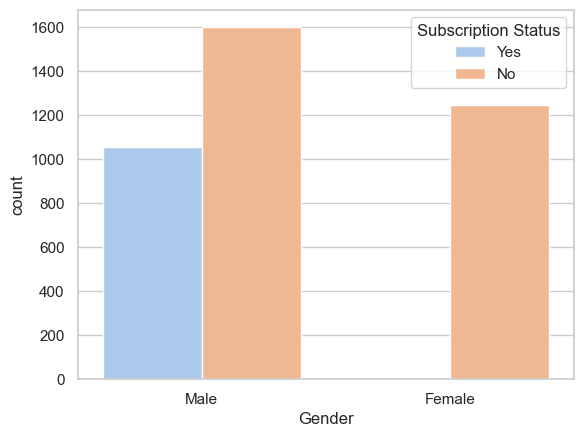

In [107]:
sns.countplot(data=df, x='Gender', hue='Subscription Status', palette='pastel');

Действительно, все подписки были приобретены мужчинами. 

## <h2>Задание 1.2</h2>

Помимо гипотез:
* найдите самый популярный товар
* постройте распределение покупателей по полу
* определите, какой пол (и отдельно возраст) покупает больше всего, чаще всего, самые дорогие товары
* определите, есть ли зависимость между цветом одежды и сезоном.
* посчитайте наш сезонный mau (уникальных пользователей за сезон) и его динамику.
* найдите самую популярную букву в названии одежды. 

##### **Самый популярный товар**


In [108]:
df['Item Purchased'].value_counts().head()

Item Purchased
Blouse     171
Jewelry    171
Pants      171
Shirt      169
Dress      166
Name: count, dtype: int64

Самые популярные товары: **Blouse**, **Jewelry**, **Pants**.

##### **Распределение покупателей по полу**

In [109]:
fig = px.histogram(
    df, 
    x='Gender', 
    color='Gender'
)\
    .update_layout(
    width=600,  
    height=400)

fig.show()

##### **Какой пол покупает больше всего, чаще всего, самые дорогие товары**

**Какой пол  покупает больше всего?**

Сравниваем суммарные расходы на покупки между мужчинами и женщинами. 

In [110]:
avg_women = df[df['Gender'] == 'Female']['Purchase Amount (USD)'].mean()
avg_men = df[df['Gender'] == 'Male']['Purchase Amount (USD)'].mean()
print(f"Women: ${avg_women:.2f}\nMen: ${avg_men:.2f} ")
t_stat, p_value = ttest_ind(df[df['Gender'] == 'Female']['Purchase Amount (USD)'], 
                            df[df['Gender'] == 'Male']['Purchase Amount (USD)'])

print(f"T-statistic = {t_stat:.3f}, p-value = {p_value:.3f}")

Women: $60.25
Men: $59.54 
T-statistic = 0.877, p-value = 0.381


`P-value > 0.05`, нет статистически значимых различий между полами. Все делают примерно одинаковые покупки.

**Какой пол  покупает чаще всего?**

Сравниваем частоту покупок для каждого пола. 

Преобразуем столбец `Frequency of Purchases` к числам:

In [111]:
frequency_mapping = {
    'Weekly': 52,
    'Bi-Weekly': 26,
    'Fortnightly': 26,
    'Monthly': 12,
    'Quarterly': 4,
    'Every 3 Months': 4,
    'Annually': 1
}

df['Frequency (Numeric)'] = df['Frequency of Purchases'].map(frequency_mapping)

In [112]:
df.groupby('Gender')['Frequency (Numeric)'].mean()

Gender
Female    17.544071
Male      17.437029
Name: Frequency (Numeric), dtype: float64

In [113]:
male_frequency = df[df['Gender'] == 'Male']['Frequency (Numeric)']
female_frequency = df[df['Gender'] == 'Female']['Frequency (Numeric)']

# Применяем t-тест для проверки значимости различий между мужчинами и женщинами
t_stat, p_value = ttest_ind(male_frequency, female_frequency)

print(f"T-statistic: {t_stat:.3f}, p-value: {p_value:.3f}")

T-statistic: -0.185, p-value: 0.853


`P-value > 0.05`, нет статистически значимых различий между полами. Мужчины и женщины совершают покупки с одинаковой частотой.

**Какой пол  покупает самые дорогие товары?**


Самые дорогие товары определим из 90-й процентиля, то есть самые дорогие товары, превышают некоторую пороговую цену ($93).

In [114]:
price_90_quantile = df['Purchase Amount (USD)'].quantile(0.9)
expensive_items = df[df['Purchase Amount (USD)'] >= price_90_quantile]
price_90_quantile

93.0

In [115]:
gender_expensive_counts = pd.crosstab(expensive_items['Gender'], expensive_items['Customer ID'])

chi2, p, dof, expected = chi2_contingency(gender_expensive_counts)

print(f"Chi-square statistic = {chi2:.3f}, P-value = {p:.3f}")

Chi-square statistic = 407.000, P-value = 0.477


`P-value > 0.05`, нет статистически значимых различий при покупки дорогих товаров между полами. При использовании 90-го процентиля для определения дорогих товаров, оказалось, что мужчины и женщины покупают такие товары с примерно одинаковой частотой. 

##### **Какой возраст покупает больше всего, чаще всего, самые дорогие товары**

**Какой возраст покупает больше всего?**

In [116]:
group_0_31 = df[df['Age_segment'] == '0-31']['Purchase Amount (USD)']
group_32_44 = df[df['Age_segment'] == '32-44']['Purchase Amount (USD)']
group_45_57 = df[df['Age_segment'] == '45-57']['Purchase Amount (USD)']
group_57_plus = df[df['Age_segment'] == '57+']['Purchase Amount (USD)']

f_stat, p_value = f_oneway(group_0_31, group_32_44, group_45_57, group_57_plus)
print(f"ANOVA F-statistic = {f_stat:.3f}, p-value = {p_value:.3f}")

ANOVA F-statistic = 0.665, p-value = 0.573


`P-value > 0.05`, нет статистически значимых различий между возрастными группами. Все совершают похожие покупки

**Какой возраст покупает чаще всего?**

In [117]:
df.groupby('Age_segment', observed=False)['Frequency (Numeric)'].mean()

Age_segment
0-31     17.293774
32-44    17.707006
45-57    17.877282
57+      17.005297
Name: Frequency (Numeric), dtype: float64

In [118]:
group_0_31_frequency = df[df['Age_segment'] == '0-31']['Frequency (Numeric)']
group_32_44_frequency = df[df['Age_segment'] == '32-44']['Frequency (Numeric)']
group_45_57_frequency = df[df['Age_segment'] == '45-57']['Frequency (Numeric)']
group_57_plus_frequency = df[df['Age_segment'] == '57+']['Frequency (Numeric)']

f_stat_frequency, p_value_frequency = f_oneway(
    group_0_31_frequency, group_32_44_frequency, group_45_57_frequency, group_57_plus_frequency
)

print(f"ANOVA по частоте покупок: F-statistic = {f_stat_frequency:.3f}, p-value = {p_value_frequency:.3f}")


ANOVA по частоте покупок: F-statistic = 0.533, p-value = 0.659


`P-value > 0.05`, нет статистически значимых различий между возрастными группами. Все совершают покупки с одинаковой частотой.

**Какой возраст покупает самые дорогие товары?**

Воспользуемся решением с 90-й процентилем для определения дорогих товаров.

In [119]:
group_0_31_expensive = expensive_items[expensive_items['Age_segment'] == '0-31']['Purchase Amount (USD)']
group_32_44_expensive = expensive_items[expensive_items['Age_segment'] == '32-44']['Purchase Amount (USD)']
group_45_57_expensive = expensive_items[expensive_items['Age_segment'] == '45-57']['Purchase Amount (USD)']
group_57_plus_expensive = expensive_items[expensive_items['Age_segment'] == '57+']['Purchase Amount (USD)']

f_stat, p_value = f_oneway(group_0_31_expensive, group_32_44_expensive, group_45_57_expensive, group_57_plus_expensive)

print(f"ANOVA F-statistic: {f_stat:.3f}, p-value: {p_value:.3f}")

ANOVA F-statistic: 0.234, p-value: 0.873


`P-value > 0.05`, нет статистически значимых различий между возрастными группами при покупке дорогих товаров.

##### **Зависимость между цветом одежды и сезоном**

In [120]:
color_season_table = pd.crosstab(df['Color'], df['Season'])

chi2, p, dof, expected = chi2_contingency(color_season_table)
print(f"Chi-square statistic = {chi2:.3f}, P-value = {p:.3f}")

Chi-square statistic = 64.651, P-value = 0.719


Получили `p > 0.05`, зависимости нет, и выбор цвета одежды не связан с сезоном.

##### **Сезонный mau (уникальных пользователей за сезон) и его динамику**

In [121]:
seasonal_mau = df.groupby('Season')['Customer ID'].nunique()
seasonal_mau

Season
Fall      975
Spring    999
Summer    955
Winter    971
Name: Customer ID, dtype: int64

In [122]:
fig = px.bar(
    x=seasonal_mau.index, 
    y=seasonal_mau.values, 
    title='Seasonal Monthly Active Users (MAU)',
    text=seasonal_mau.values)\
    .update_layout(xaxis_title='Season', yaxis_title='Number of Unique Users', width=500, height=500)

fig.show()

##### **Самую популярная буква в названии одежды**

Соединим все названия товаров в одну строку и посчитаем частоту каждой буквы с помощью библиотеки `collections`.

In [123]:
all_letters = ''.join(df['Item Purchased']).replace(' ', '')

In [124]:
from collections import Counter

letter_counts = Counter(all_letters)
most_popular_letter = max(letter_counts, key=letter_counts.get)
most_popular_letter

's'

`s` - cамая частая буква в названии одежды. 

**Первичная работа с данными**

In [125]:
df = pd.read_csv('drinks.csv')
df.head(5)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


In [126]:
df.shape

(193, 5)

In [127]:
df = df.drop_duplicates()
df.shape

(193, 5)

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 7.7+ KB


In [129]:
df.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


**Топ стран по потреблению любого алкоголя в литрах**

In [130]:
df_tot = df.sort_values(by='total_litres_of_pure_alcohol', ascending=False)[['country','total_litres_of_pure_alcohol']].head(15)
df_tot

,country,total_litres_of_pure_alcohol
15,Belarus,14.4
98,Lithuania,12.9
3,Andorra,12.4
68,Grenada,11.9
45,Czech Republic,11.8
61,France,11.8
141,Russian Federation,11.5
81,Ireland,11.4
155,Slovakia,11.4
99,Luxembourg,11.4


**Топ стран по потреблению пива**

In [131]:
df_beers = df.sort_values(by='beer_servings', ascending=False)[['country','beer_servings']].head(15)

df_beers

,country,beer_servings
117,Namibia,376
45,Czech Republic,361
62,Gabon,347
65,Germany,346
98,Lithuania,343
135,Poland,343
188,Venezuela,333
81,Ireland,313
129,Palau,306
140,Romania,297


**Топ стран по потреблению вина**

In [132]:
df_wine = df.sort_values(by='wine_servings', ascending=False)[['country','wine_servings']].head(15)
df_wine

,country,wine_servings
61,France,370
136,Portugal,339
3,Andorra,312
166,Switzerland,280
48,Denmark,278
156,Slovenia,276
99,Luxembourg,271
42,Croatia,254
83,Italy,237
55,Equatorial Guinea,233


**Топ стран по потреблению других спиртных напитков**

In [133]:
df_spirits = df.sort_values(by='spirit_servings', ascending=False)[['country','spirit_servings']].head(15)
df_spirits

,country,spirit_servings
68,Grenada,438
15,Belarus,373
73,Haiti,326
141,Russian Federation,326
144,St. Lucia,315
72,Guyana,302
155,Slovakia,293
50,Dominica,286
169,Thailand,258
40,Cook Islands,254


In [134]:
fig_beer = px.bar(df_beers.iloc[::-1], x='beer_servings', y='country', 
                  title='Countries by Beer Servings 🍺', 
                  labels={'beer_servings': 'Beer Servings', 'country': 'Country'},
                  orientation='h').update_traces(marker_color='gold')

fig_wine = px.bar(df_wine.iloc[::-1], x='wine_servings', y='country', 
                  title='Countries by Wine Servings 🍷', 
                  labels={'wine_servings': 'Wine Servings', 'country': 'Country'},
                  orientation='h').update_traces(marker_color='darkred ')

fig_spirits = px.bar(df_spirits.iloc[::-1], x='spirit_servings', y='country', 
                     title='Countries by Spirit Servings 🍸', 
                     labels={'spirit_servings': 'Spirit Servings', 'country': 'Country'},
                     orientation='h').update_traces(marker_color='skyblue')

fig_tot = px.bar(df_tot.iloc[::-1], x='total_litres_of_pure_alcohol', y='country', 
                  title='Countries by Total Litres of Pure Alcohol 🥂', 
                  labels={'total_litres_of_pure_alcohol': 'Total Litres of Pure Alcohol', 'country': 'Country'},
                  orientation='h').update_traces(marker_color='lightgreen')

fig_beer.show()
fig_wine.show()
fig_spirits.show()
fig_tot.show()


Лидеры по потреблении алкоголя в разных странах:

1. **Пиво**: Намибия, Чехия, Габон, Германия, Литва, Польша.
2. **Вино**: Франция, Португалия, Андорра, Швейцария, Дания.
3. **Другие спиртные напитки**: Гренада, Беларусь, Гаити, Россия, Сент-Люсия .
4. **Общее потребление алкоголя**: Беларусь, Литва, Андорра, Гренада, Чехия.

# <h1>Задание 3</h1> 

У нас есть полный каталог всех случаев, когда кто-то проклинал или истекал кровью в фильме Квентина Тарантино. https://github.com/fivethirtyeight/data/tree/master/tarantino

Определите:

* число проклятий, летальных исходов и их соотношение по фильмам 

* частоту употребления конкретных проклятий 

* распределение времени между проклятиями 

**Первичная работа с данными**

In [135]:
df = pd.read_csv('tarantino.csv')
df.sample(5)

,movie,type,word,minutes_in
1710,Jackie Brown,word,motherfucker,70.12
957,Kill Bill: Vol. 1,word,shit,46.45
1645,Jackie Brown,word,fuck,31.97
217,Reservoir Dogs,word,fucking,46.66
95,Reservoir Dogs,word,fucking,20.96


In [136]:
df.shape

(1894, 4)

In [137]:
df = df.drop_duplicates()
df.shape

(1840, 4)

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1840 entries, 0 to 1893
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   movie       1840 non-null   object 
 1   type        1840 non-null   object 
 2   word        1685 non-null   object 
 3   minutes_in  1840 non-null   float64
dtypes: float64(1), object(3)
memory usage: 71.9+ KB


In [139]:
df.describe(include='object')

,movie,type,word
count,1840,1840,1685
unique,7,2,60
top,Pulp Fiction,word,fucking
freq,469,1685,404


In [140]:
df.movie.value_counts()

movie
Pulp Fiction           469
Reservoir Dogs         421
Jackie Brown           369
Django Unchained       301
Kill Bill: Vol. 1      114
Inglorious Basterds     94
Kill Bill: Vol. 2       72
Name: count, dtype: int64

In [141]:
df.isnull().sum()

movie           0
type            0
word          155
minutes_in      0
dtype: int64

In [142]:
df[df['type'] == 'death'].isnull().sum()

movie           0
type            0
word          155
minutes_in      0
dtype: int64

Как и ожидалось слова пропущены только в `death`. Дубликаты удалены.

Определим **число проклятий, летальных исходов и их соотношение по фильмам**

In [143]:
df.type.value_counts()

type
word     1685
death     155
Name: count, dtype: int64

In [144]:
event_count = pd.crosstab(df['movie'], df['type'], dropna=False)

event_count['ratio'] = event_count['word'] / event_count['death']
event_count


type,death,word,ratio
movie,,,
Django Unchained,41,260,6.341463
Inglorious Basterds,36,58,1.611111
Jackie Brown,4,365,91.250000
Kill Bill: Vol. 1,57,57,1.000000
Kill Bill: Vol. 2,3,69,23.000000
Pulp Fiction,7,462,66.000000
Reservoir Dogs,7,414,59.142857


Определим **частоту употребления конкретных проклятий**

In [145]:
df['word'].value_counts()

word
fucking          404
shit             219
fuck             211
n-word           177
ass              140
goddamn          113
motherfucker      69
bitch             63
hell              44
damn              37
motherfucking     27
fucked            24
bullshit          15
motherfuckers     15
pussy             11
asshole           10
bastard           10
bitches            9
fucker             8
dick               8
assholes           5
negro              5
dicks              5
asses              4
shitty             4
damned             3
fucks              3
shithead           3
horseshit          2
gooks              2
japs               2
cunt               2
shitload           2
cocksucker         2
wetback            2
fuckers            1
horeshit           1
jap                1
shittiest          1
fuckup             1
jackass            1
goddamned          1
slut               1
squaw              1
asshead            1
shitting           1
shitless           1
bastards

Определим **распределение времени между проклятиями**

In [146]:
df_word = df[df['type'] == 'word']

In [147]:
df_word = df_word.sort_values(by=['movie', 'minutes_in'])


In [148]:
df_word['time_diff'] = df_word.groupby('movie')['minutes_in'].diff()
df_word.head()

,movie,type,word,minutes_in,time_diff
1213,Django Unchained,word,goddamn,7.23,NaN
1215,Django Unchained,word,goddamn,8.37,1.14
1216,Django Unchained,word,bitch,8.38,0.01
1217,Django Unchained,word,damn,8.65,0.27
1218,Django Unchained,word,fucking,8.87,0.22


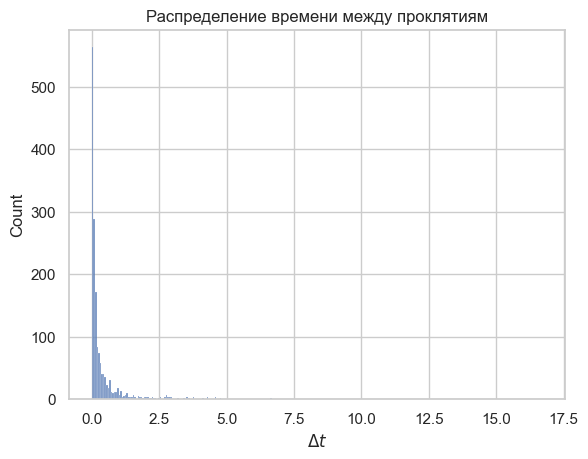

In [149]:
sns.histplot(data=df_word, x='time_diff').set(title='Распределение времени между проклятиям', xlabel=r'$\Delta t$');

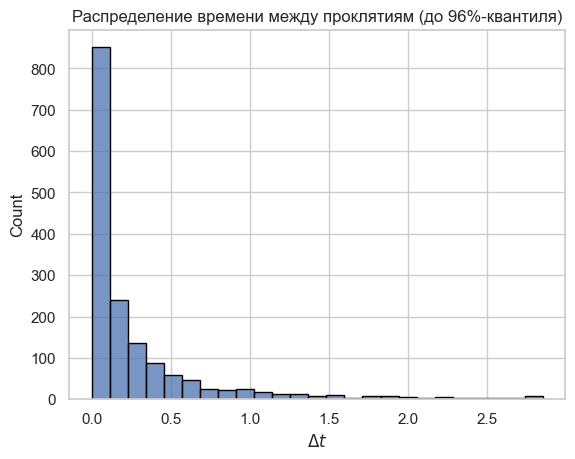

In [150]:
quantile = df_word['time_diff'].quantile(0.96)
filtered_time_diff = df_word['time_diff'][df_word['time_diff'] <= quantile]
sns.histplot(filtered_time_diff, bins=25, edgecolor='black')\
    .set(title='Распределение времени между проклятиям (до 96%-квантиля)', xlabel=r'$\Delta t$');